In [1]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import datetime
from pandas.plotting import scatter_matrix
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY
from math import pi
from pprint import pprint
from config import *

sns.set_style('dark')

C:\Users\nabis\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
dow = pd.read_csv('Resources/DowJones.csv')
nasdaq = pd.read_csv('Resources/Nasdaq.csv')
sp500 = pd.read_csv('Resources/SP500.csv')
merged_df = pd.merge(dow,nasdaq, how='left', on='Date', suffixes=(' Dow', ' Nasdaq'))
merged_df = pd.merge(merged_df, sp500, how='left', on='Date')
merged_df.rename(columns={'Value': 'Value S&P 500'}, inplace=True)
merged_df.to_csv('Resources/merged.csv', index=False)
merged_df['Date']= pd.to_datetime(merged_df['Date'])
merged_df.head()

,Date,Value Dow,Value Nasdaq,Value S&P 500
0,1977-09-02,872.31,100.83,97.45
1,1977-09-09,857.04,100.91,96.37
2,1977-09-16,856.81,100.74,96.48
3,1977-09-23,839.14,99.57,95.04
4,1977-09-30,847.11,100.85,96.53


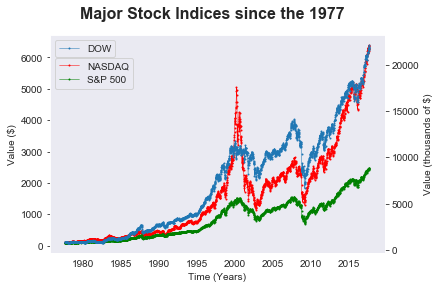

In [3]:
x_axis = merged_df['Date']

fig, ax1 = plt.subplots()
fig.suptitle("Major Stock Indices since the 1977", fontsize=16, fontweight="bold")

ax1.plot(x_axis, merged_df['Value Nasdaq'], linewidth=0.5, marker="o", color="r", markersize=1, label='NASDAQ')

ax1.plot(x_axis, merged_df['Value S&P 500'], linewidth=0.5, marker="o", color="g", markersize=1, label='S&P 500')
ax1.set_ylabel("Value ($)")
ax1.set_xlabel("Time (Years)")
plt.legend(loc='upper left',bbox_to_anchor=(0,0.92))

ax2 = ax1.twinx()
ax2.plot(x_axis, merged_df['Value Dow'], linewidth=0.5, marker="o", markersize=1, label='DOW')
ax2.tick_params(axis='y')
ax2.set_ylabel("Value (thousands of $)")

plt.legend(loc='upper left', bbox_to_anchor=(0,1))
plt.savefig('Figures/Figure1')
plt.show()

In [4]:
# Initializing lists for storing data
location = []
cases = []
deaths = []

# Querying API for COVID-19 data and appending it to appropriate list
r = requests.get(f'https://finnhub.io/api/v1/covid19/us?token={Api_key}').json()
for i in range(len(r)):
    result=r[i]
    location.append(result['state'])
    cases.append(result['case'])
    deaths.append(result['death'])

In [5]:
# Creating a Pandas DataFrame
d = {'State':location,
    'Cases': cases,
    'Deaths': deaths}

df = pd.DataFrame(d)
df.head()

,State,Cases,Deaths
0,New York,432964,32865
1,New Jersey,188692,16044
2,California,650265,11742
3,Michigan,104629,6639
4,Florida,588602,10050


In [6]:
# Cleaning the DataFrame to show only the 50 US states, removing US territories and others
# Sorting the DataFrame by most cases to least cases
# Resetting the index and dropping original index column
cleaned_df = df.loc[df['State'].isin(state_names)].sort_values('Cases', ascending=False).reset_index().drop(columns='index')
cleaned_df.head()

,State,Cases,Deaths
0,California,650265,11742
1,Florida,588602,10050
2,Texas,577783,10760
3,New York,432964,32865
4,Georgia,247286,4908


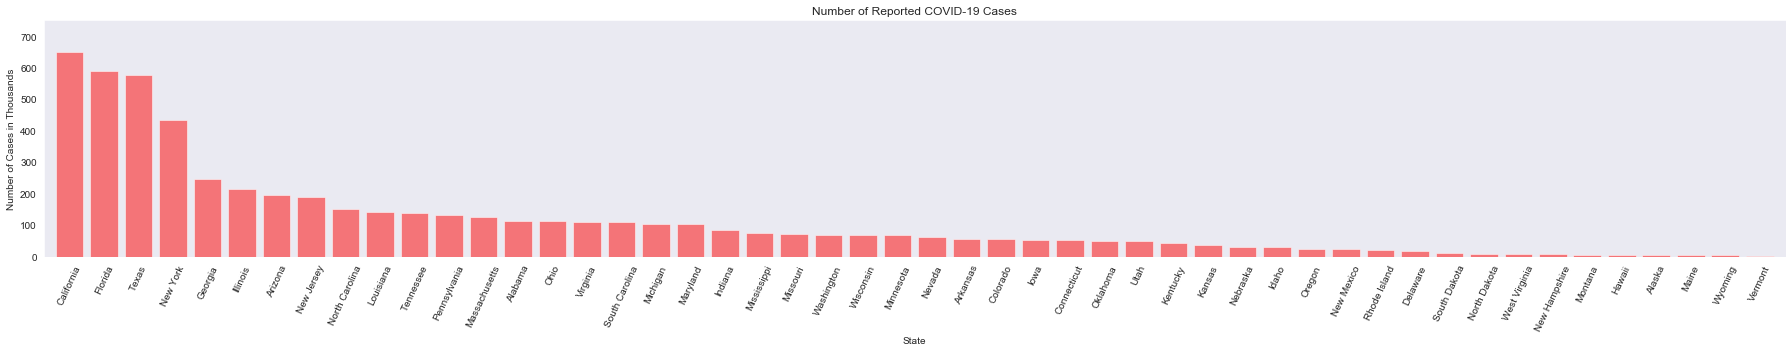

In [7]:
# Bar chart of the cleaned df
# Our x axis will be the states, while our y axis will be the number of cases for each state in thousands 
plt.figure(figsize=(25,5))
x_axis = cleaned_df['State']
y_axis = cleaned_df['Cases']/1000

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# Defining where to place the ticks on the x axis with their rotation
tick_locations = [value for value in x_axis] 
plt.xticks(tick_locations,x_axis,rotation = 65)

# Defining limits of the x and y axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+100)

# Adding aesthetics to the chart to clean it up
plt.title("Number of Reported COVID-19 Cases")
plt.xlabel("State")
plt.ylabel("Number of Cases in Thousands")
plt.tight_layout()
plt.savefig("Figures/Figure2.png")
plt.show()

C:\Users\nabis\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


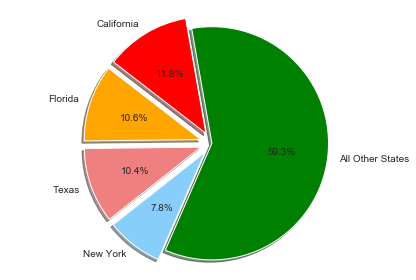

In [8]:
# Plotting the top 5 most cases on a Pie chart
# Creating labels for Pie chart
labels = ['California', 'Florida', 'Texas', 'New York', 'All Other States']

# Defining the values for each category to be plotted
Ca=cleaned_df.loc[cleaned_df['State']=='California',['Cases']].sum()
Fl=cleaned_df.loc[cleaned_df['State']=='Florida',['Cases']].sum()
Tx=cleaned_df.loc[cleaned_df['State']=='Texas',['Cases']].sum()
Ny=cleaned_df.loc[cleaned_df['State']=='New York',['Cases']].sum()
Others=cleaned_df['Cases'].sum()-Ca-Fl-Tx-Ny

# Cleaning it up by combining it in a list
d = [Ca,Fl,Tx,Ny,Others]

# Defining the colors to be used for each category
colors = ['red', 'orange', 'lightcoral', 'lightskyblue', 'green']

# Creating a visual affect by extruding some of the slices
explode = (0.1,0.1,0.1,0.1,0)

# Creating the Pie chart based on the parameters defined above
plt.pie(d, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)

# Defining the axis of the pie chart to be equal
plt.axis('equal')

plt.tight_layout()
plt.savefig("Figures/Figure3.png")
plt.show()

In [9]:
# Data from Kaggle
# Reading in a CSV file that breaks down the daily COVID-19 cases by county
Daily_count = pd.read_csv("Resources/us_counties_covid19_daily.csv")

# Filtering the data to show only dates since March 1st, 2020. Prior data is negligble.
Daily_count=Daily_count.loc[Daily_count['date']>'2020-03-01']

# Converting the Date column (object) to date
Daily_count['date']=pd.to_datetime(Daily_count['date'])

# Grouping the data by date, as each date had entries for each county in the US
grouped = Daily_count.groupby(['date']).sum()

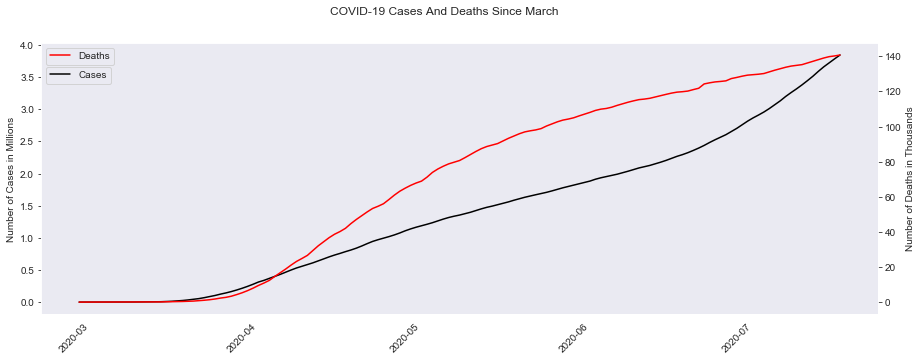

In [10]:
# Plotting a line chart
# Using the date as x axis. There are 2 y axis, cases and deaths.
# On the left, it is cases in millions, on the right it is deaths in thousands
x_axis = grouped.index
y_axis = grouped['cases']/1000000
y_axis2 = grouped['deaths']/1000

# Plotting and chart aesthetics
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle('COVID-19 Cases And Deaths Since March ')

ax1.plot(x_axis,y_axis, color="black",label='Cases')
plt.xticks(rotation=45)
plt.legend(loc='center left',bbox_to_anchor=(0,.88))
ax2 = ax1.twinx()
ax2.plot(x_axis, y_axis2,color='r',label='Deaths')
ax2.tick_params(axis='y')
ax1.set_ylabel("Number of Cases in Millions")
ax2.set_ylabel("Number of Deaths in Thousands")
plt.legend(loc='best')
plt.savefig("Figures/Figure4")
plt.show()

In [11]:
# Base URL for the API used
base_url = "https://finnhub.io/api/v1"

# Initializing lists for storing data
dow_ticker = []
dow_high = []
dow_high_date = []
dow_low = []
dow_low_date = []

# Looping through each stock in the pre-definied list (config.py)
# Not all the stocks in the list will be found on the API
# Therefore try and except
for stock in dow:
   
    try:
        query_url = f'{base_url}/stock/metric?symbol={stock}&metric=all&token={Api_key}'
        r = requests.get(query_url).json()

        dow_high.append(round(r['metric']['52WeekHigh'],2))
        dow_high_date.append(r['metric']['52WeekHighDate'])
        dow_low.append(round(r['metric']['52WeekLow'],2))
        dow_low_date.append(r['metric']['52WeekLowDate'])
        dow_ticker.append(r['symbol'])
    
    except:
        pass

# Creating a Pandas DataFrame
dow_d = {
    "Dow Ticker Symbol" : dow_ticker,
    "Dow 52 Week High" : dow_high,
    "Dow 52 Week High Date" : dow_high_date,
    "Dow 52 Week Low" : dow_low,
    "Dow 52 Week Low Date" : dow_low_date
}

dow_df = pd.DataFrame(dow_d)

# Converting dates (obj) to date
dow_df['Dow 52 Week High Date'] = pd.to_datetime(dow_df['Dow 52 Week High Date'])
dow_df['Dow 52 Week Low Date'] = pd.to_datetime(dow_df['Dow 52 Week Low Date'])

# Sorting dates for easier plotting
high_sort = dow_df.sort_values(by='Dow 52 Week High Date')
high_dates = high_sort['Dow 52 Week High Date']
low_sort = dow_df.sort_values(by='Dow 52 Week Low Date')
low_dates = low_sort['Dow 52 Week Low Date']

In [12]:
# Using Yahoo finance to pull historical data on each of the 3 indices
# January 1, 2020 YTD
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,8,6)
DJI = web.DataReader('^DJI', 'yahoo', start, end)
NDX = web.DataReader('^IXIC', 'yahoo', start, end)
SPX = web.DataReader('^GSPC', 'yahoo', start, end)

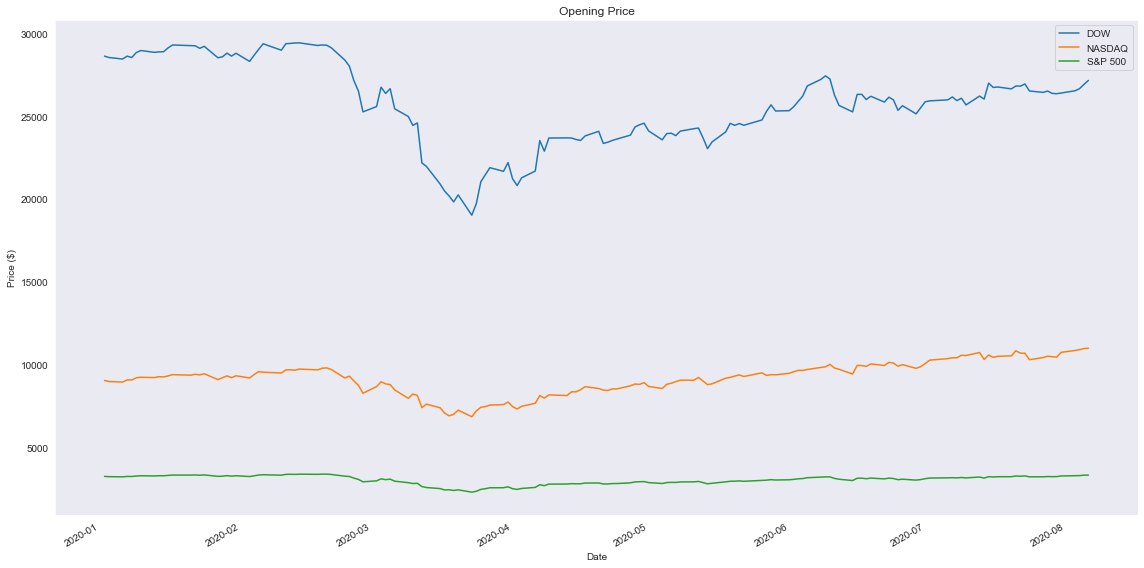

In [13]:
# Plotting the opening price for each index YTD
DJI['Open'].plot(label='DOW', figsize=(16,8), title='Opening Price')
NDX['Open'].plot(label='NASDAQ')
SPX['Open'].plot(label='S&P 500')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure5")
plt.show()

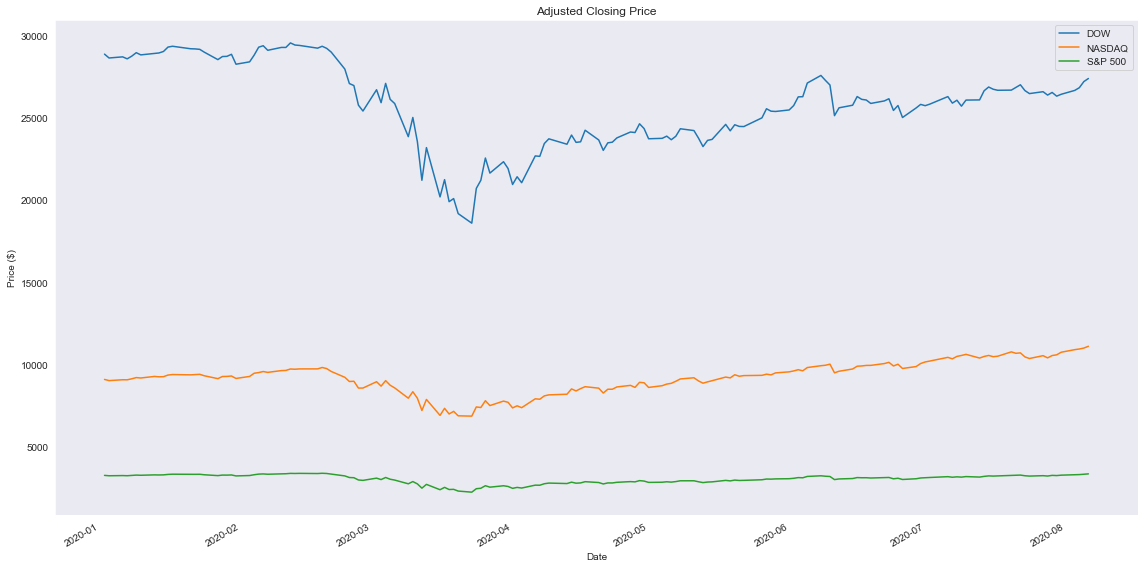

In [14]:
# Plotting the adjusted closing price for each index YTD
DJI['Adj Close'].plot(label='DOW', figsize=(16,8), title='Adjusted Closing Price')
NDX['Adj Close'].plot(label='NASDAQ')
SPX['Adj Close'].plot(label='S&P 500')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure6")
plt.show()

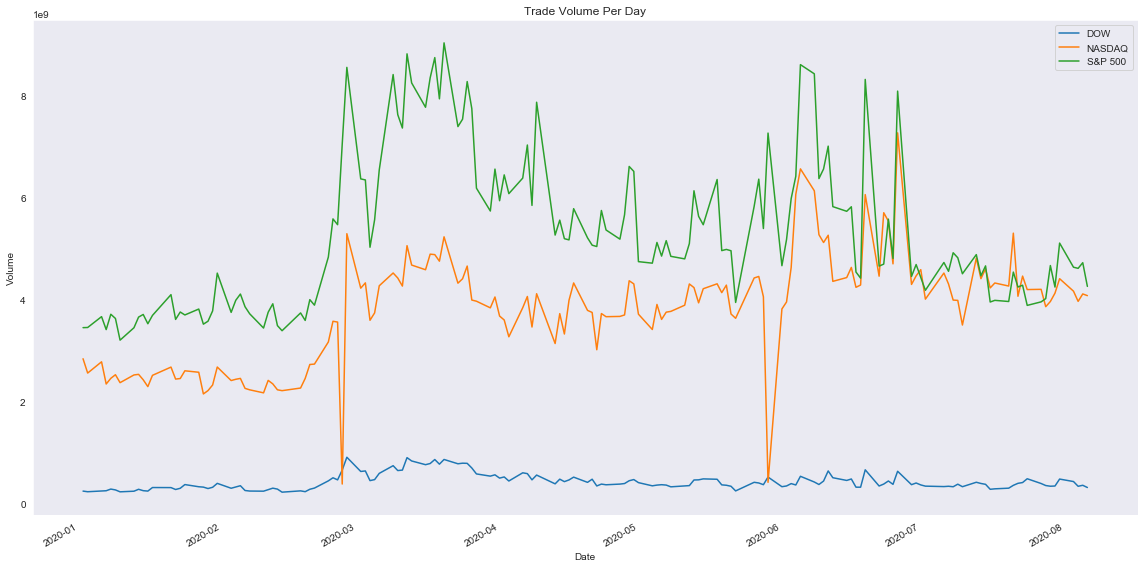

In [15]:
# Plotting trade volume per day for each index
DJI['Volume'].plot(label='DOW', figsize=(16,8), title='Trade Volume Per Day')
NDX['Volume'].plot(label='NASDAQ')
SPX['Volume'].plot(label='S&P 500')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure7")
plt.show()

In [16]:
# Finding the day with DOW's highest volume of trading 
DJI['Volume'].idxmax()

Timestamp('2020-02-28 00:00:00')

In [17]:
# Finding the day with NASDAQ's highest volume of trading 
NDX['Volume'].idxmax()

Timestamp('2020-06-26 00:00:00')

In [18]:
# Finding the day with S&P 500's highest volume of trading 
SPX['Volume'].idxmax()

Timestamp('2020-03-20 00:00:00')

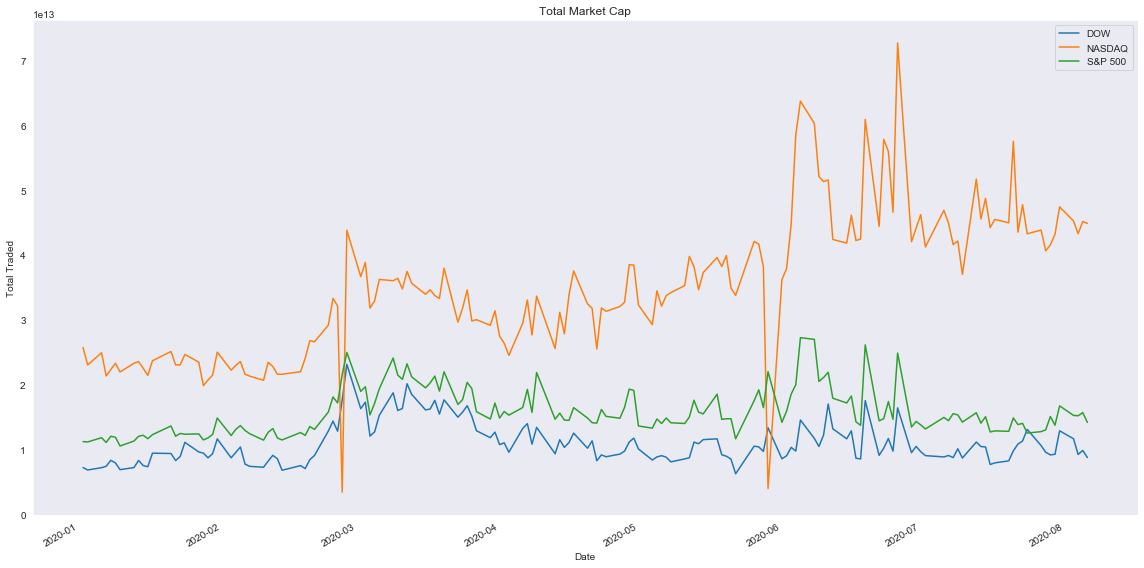

In [19]:
# To consider total market cap, not just the prices, we are doing a simple calculation to try to represent 
# total money traded by multiplying the Volume by the Open price.
# REMEMBER this isn't the actual Market Cap, it is a simple visual representation of the total amount of
# money being traded around using the time series.

DJI['Total Traded'] = DJI['Open'] * DJI['Volume']
NDX['Total Traded'] = NDX['Open'] * NDX['Volume']
SPX['Total Traded'] = SPX['Open'] * SPX['Volume']

DJI['Total Traded'].plot(label='DOW', figsize=(16,8), title="Total Market Cap")
NDX['Total Traded'].plot(label='NASDAQ')
SPX['Total Traded'].plot(label='S&P 500')
plt.ylabel('Total Traded')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure8")
plt.show()

In [20]:
# Date when max amount of money was traded. What happened on that day?
DJI['Total Traded'].idxmax()

Timestamp('2020-02-28 00:00:00')

In [21]:
# Date when max amount of money was traded. What happened on that day?
NDX['Total Traded'].idxmax()

Timestamp('2020-06-26 00:00:00')

In [22]:
# Date when max amount of money was traded. What happened on that day?
SPX['Total Traded'].idxmax()

Timestamp('2020-06-05 00:00:00')

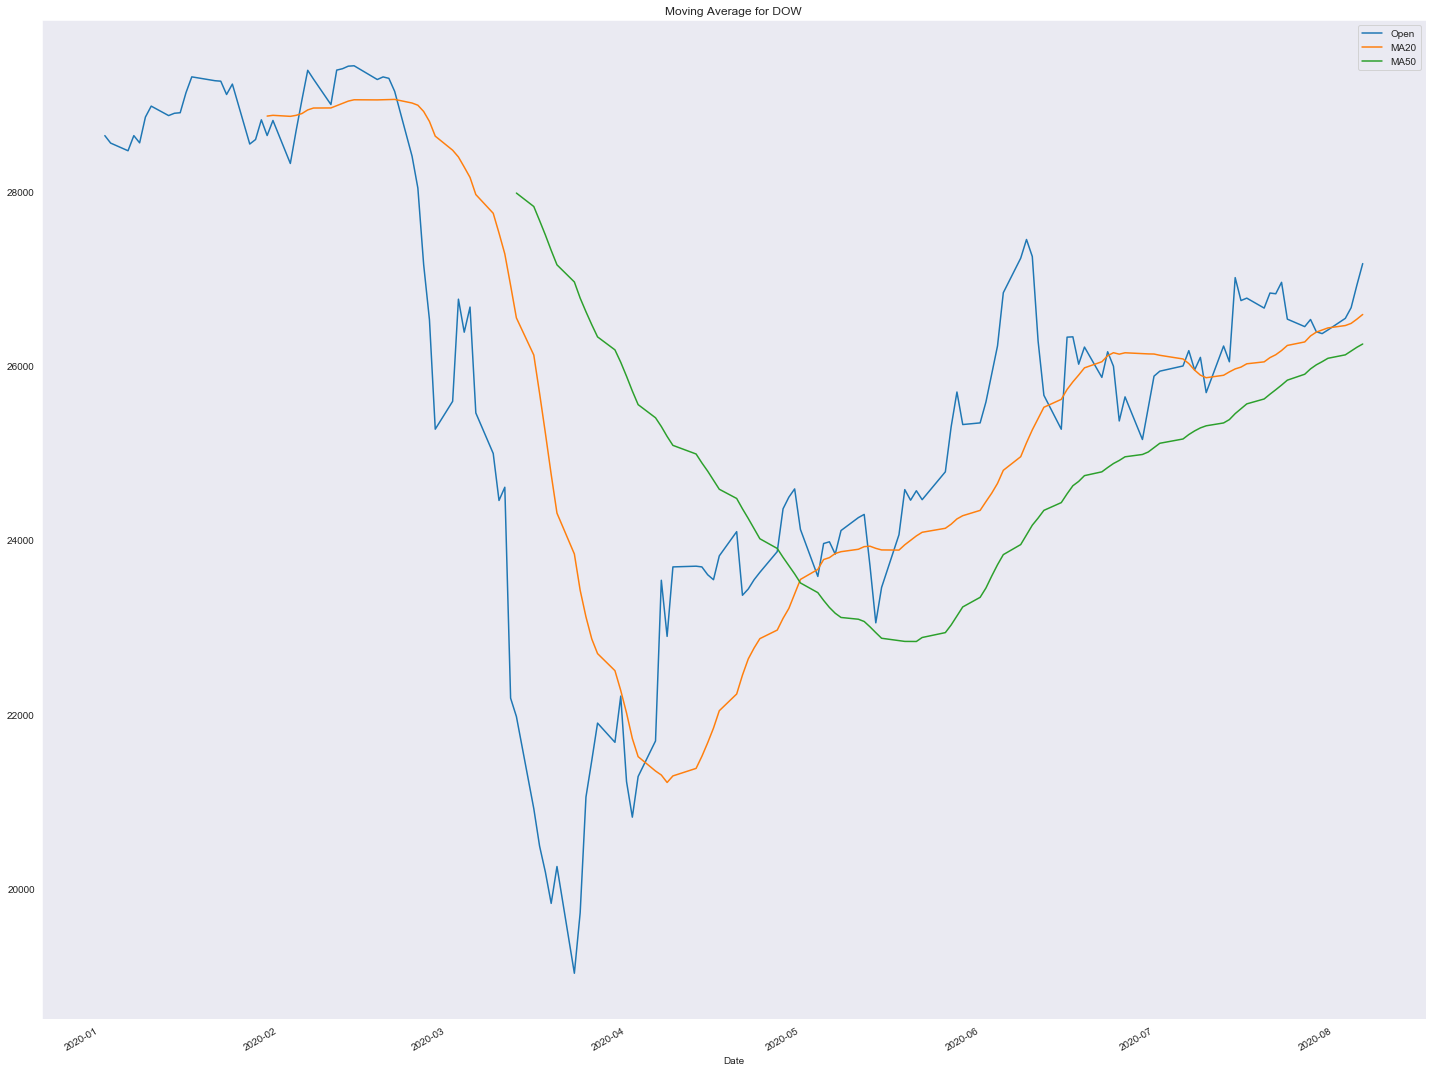

In [23]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for DOW

DJI['MA20'] = DJI['Open'].rolling(20).mean()
DJI['MA50'] = DJI['Open'].rolling(50).mean()
# DJI['MA100'] = DJI['Open'].rolling(100).mean()
DJI[['Open', 'MA20','MA50']].plot(label='DOW', figsize=(20,15), title="Moving Average for DOW")

plt.tight_layout()
plt.savefig("Figures/Figure9")
plt.show()

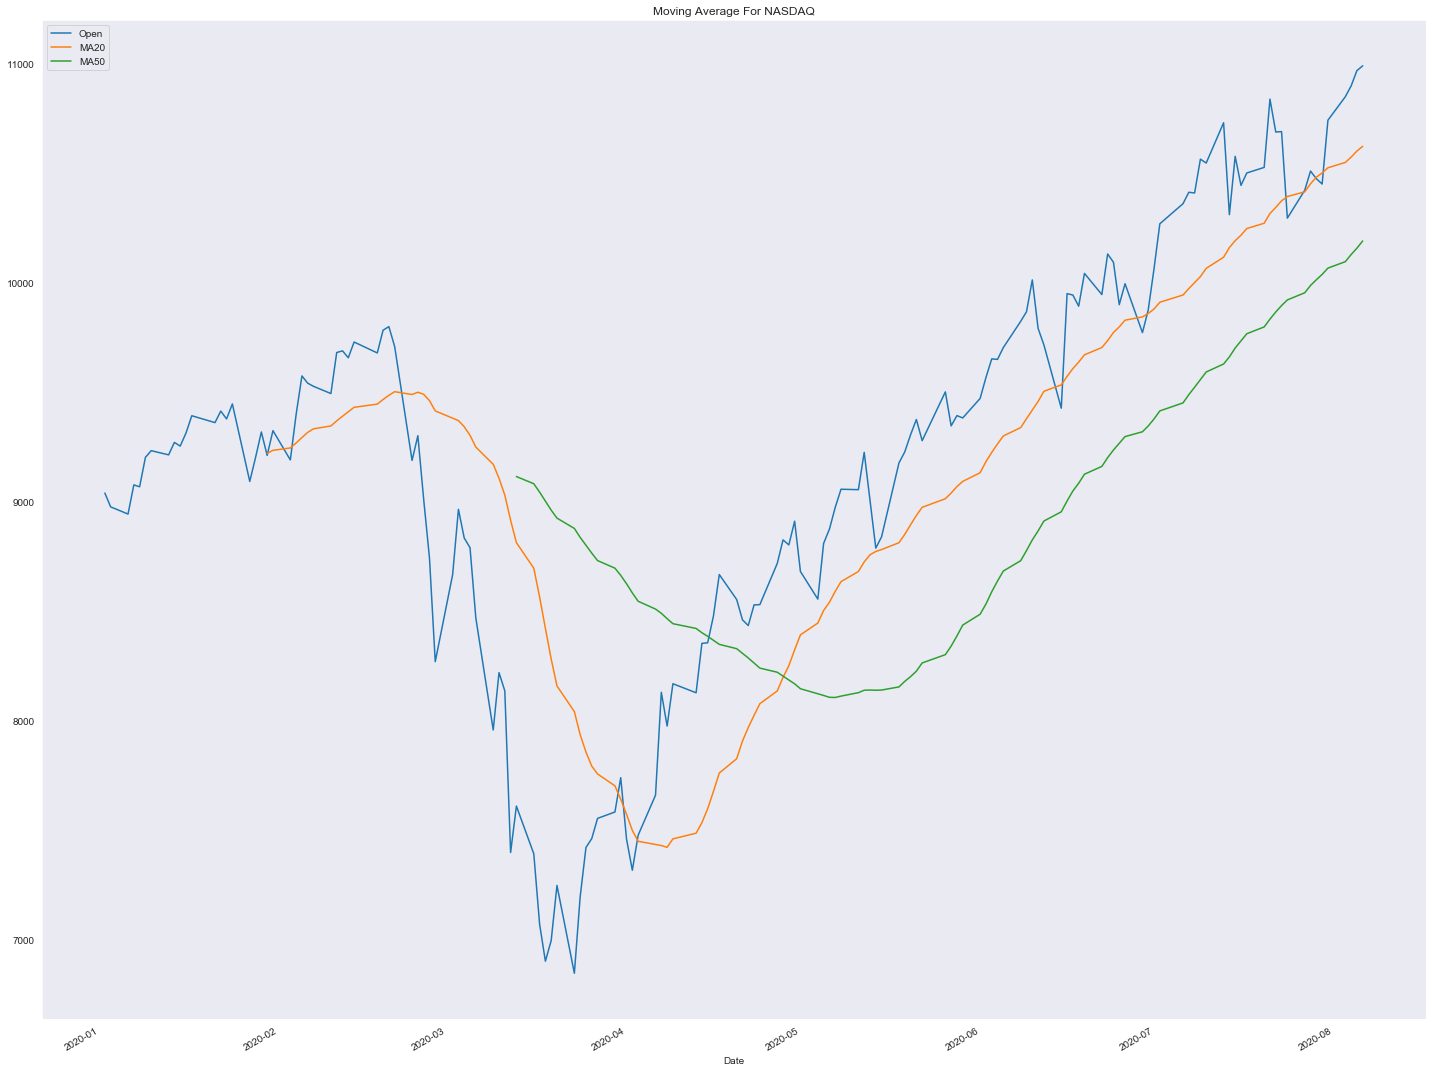

In [24]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for NASDAQ

NDX['MA20'] = NDX['Open'].rolling(20).mean()
NDX['MA50'] = NDX['Open'].rolling(50).mean()
# NDX['MA100'] = NDX['Open'].rolling(100).mean()
NDX[['Open', 'MA20','MA50']].plot(label='NASDAQ', figsize=(20,15), title="Moving Average For NASDAQ")

plt.tight_layout()
plt.savefig("Figures/Figure10")
plt.show()

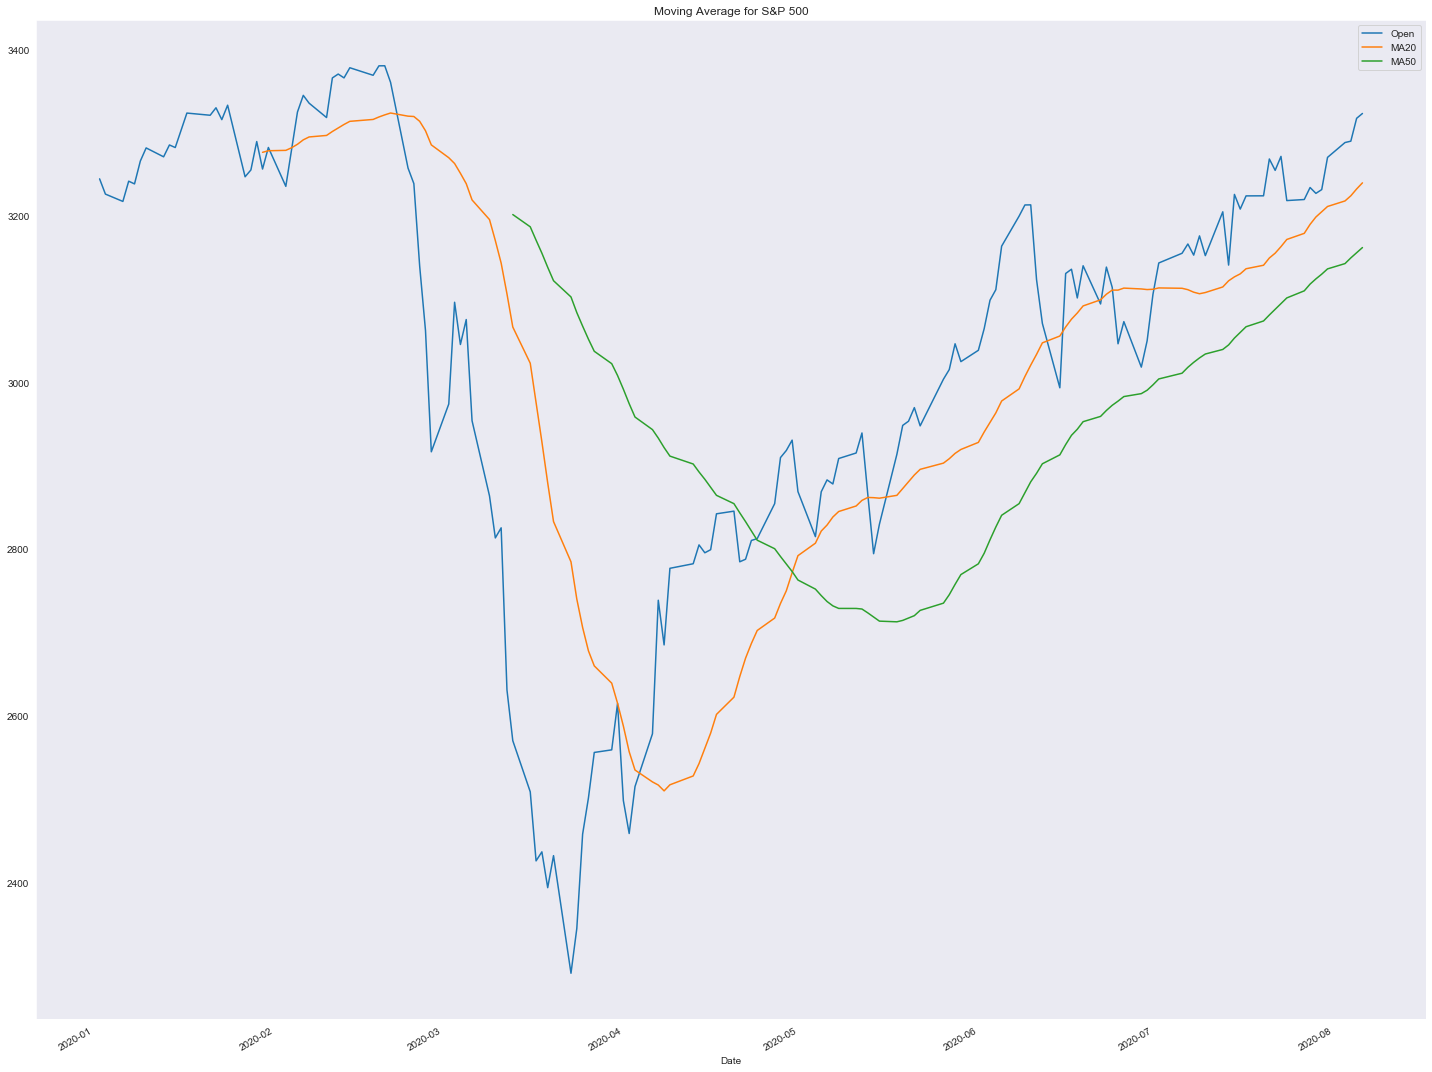

In [25]:
# Moving Averages (MA)
# Plotting MA20, MA50 and MA100 for S&P 500

SPX['MA20'] = SPX['Open'].rolling(20).mean()
SPX['MA50'] = SPX['Open'].rolling(50).mean()
# SPX['MA100'] = SPX['Open'].rolling(100).mean()
SPX[['Open', 'MA20','MA50']].plot(label='S&P 500', figsize=(20,15), title="Moving Average for S&P 500")

plt.tight_layout()
plt.savefig("Figures/Figure11")
plt.show()

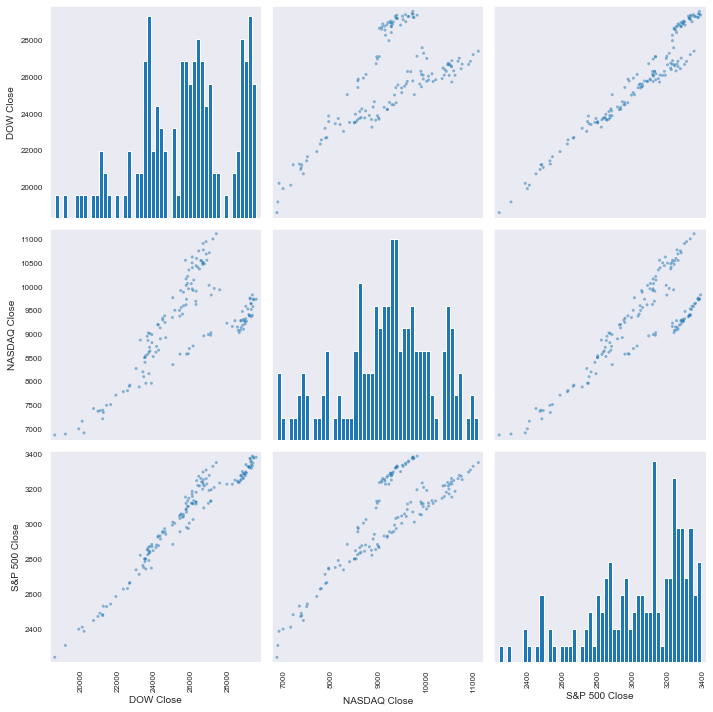

In [26]:
# Checking for a relationship between the 3 indices
index_comp = pd.concat([DJI['Close'], NDX['Close'], SPX['Close']], axis=1)
index_comp.columns=['DOW Close', 'NASDAQ Close', 'S&P 500 Close']

scatter_matrix(index_comp, figsize=(10,10), alpha=0.5, hist_kwds={'bins':50})
plt.tight_layout()
plt.savefig("Figures/Figure12")
plt.show()

In [27]:
# Creating a new df to use for candlesticks
# Resetting index
DJI_reset = DJI.reset_index()

# Adding a new column which converts the date to a number value
DJI_reset['date_ax'] = DJI_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
DJI_values = [tuple(vals) for vals in DJI_reset[list_cols].values]

# Formatting
mondays = WeekdayLocator(MONDAY)
alldays = DateLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

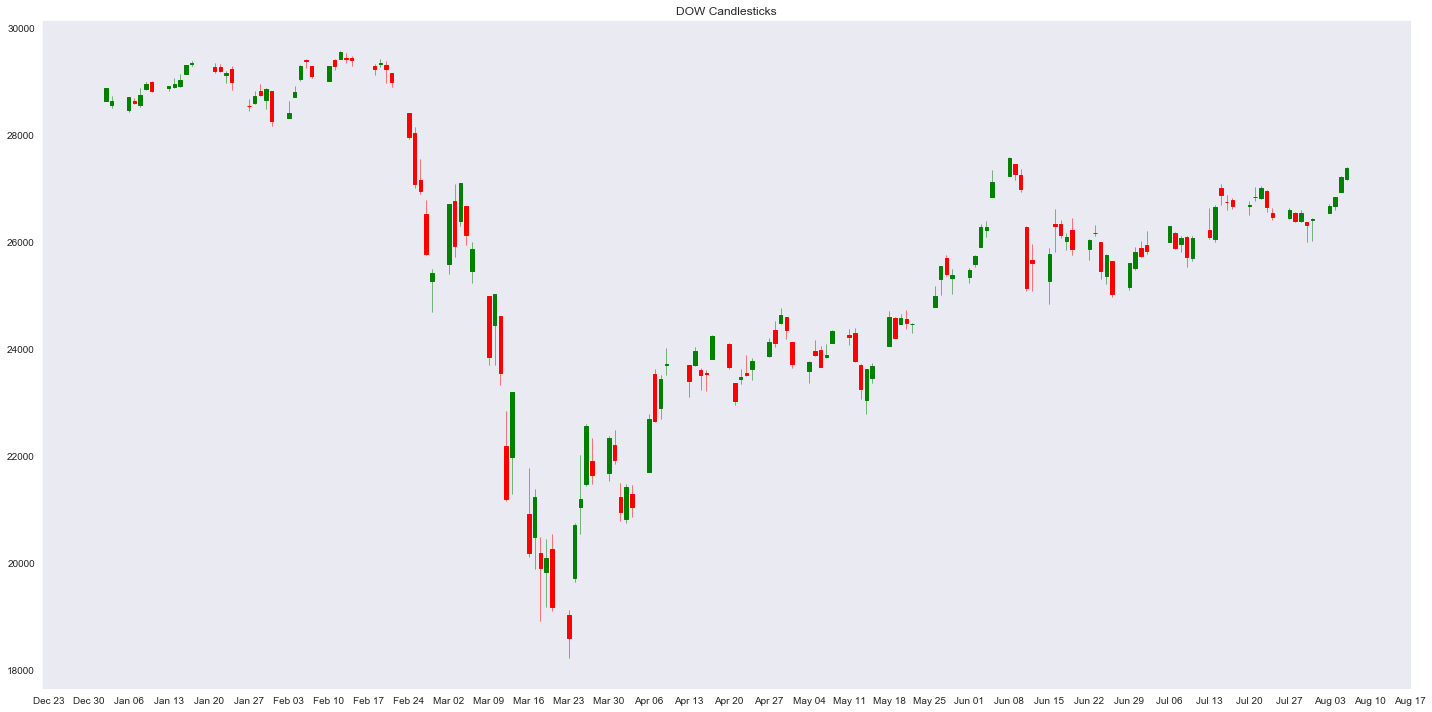

In [28]:
# Plotting candlestick chart of DOW
fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, DJI_values, width=0.6, colorup='g', colordown='r')
plt.title("DOW Candlesticks")
plt.tight_layout()
plt.savefig("Figures/Figure13")
plt.show()

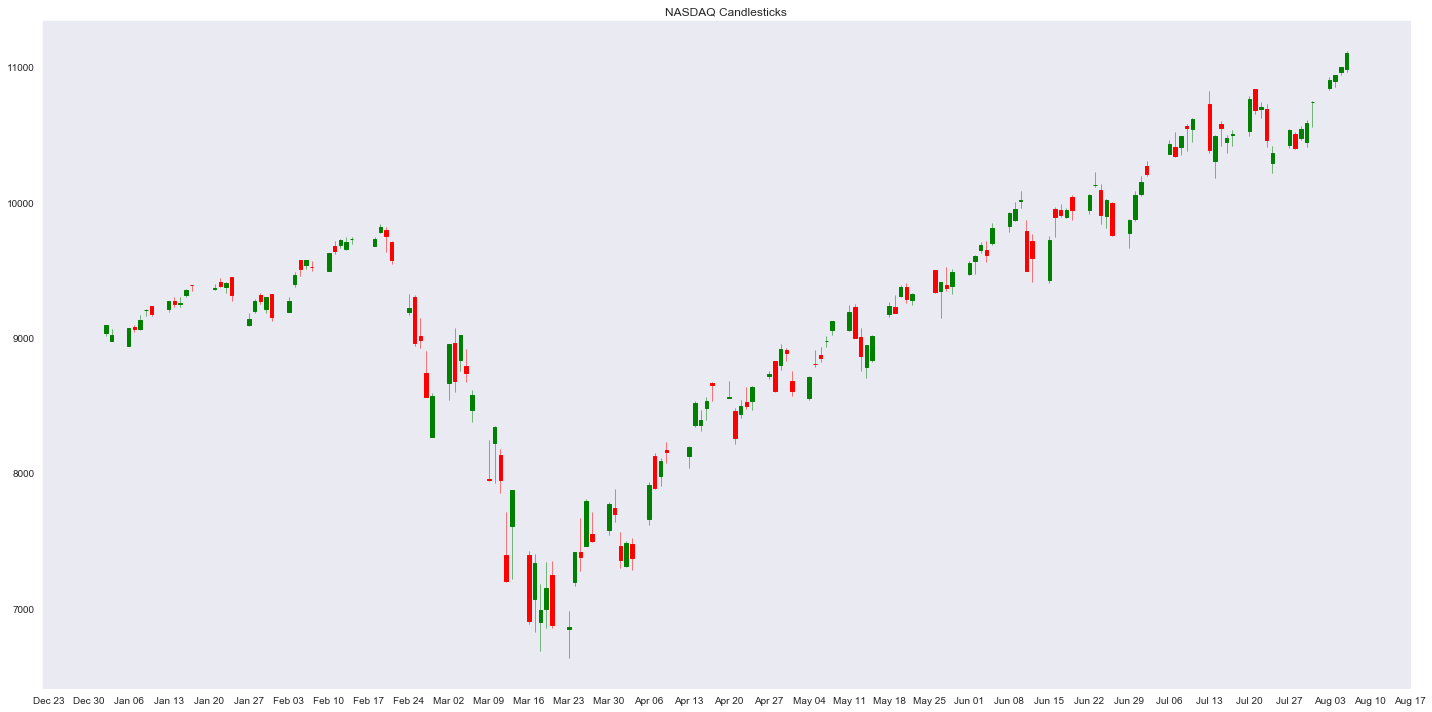

In [29]:
# Creating a new df to use for candlesticks
# Resetting index
NDX_reset = NDX.reset_index()

# Adding a new column which converts the date to a number value
NDX_reset['date_ax'] = NDX_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
NDX_values = [tuple(vals) for vals in NDX_reset[list_cols].values]

fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, NDX_values, width=0.6, colorup='g', colordown='r')
plt.title("NASDAQ Candlesticks")
plt.tight_layout()
plt.savefig("Figures/Figure14")
plt.show()

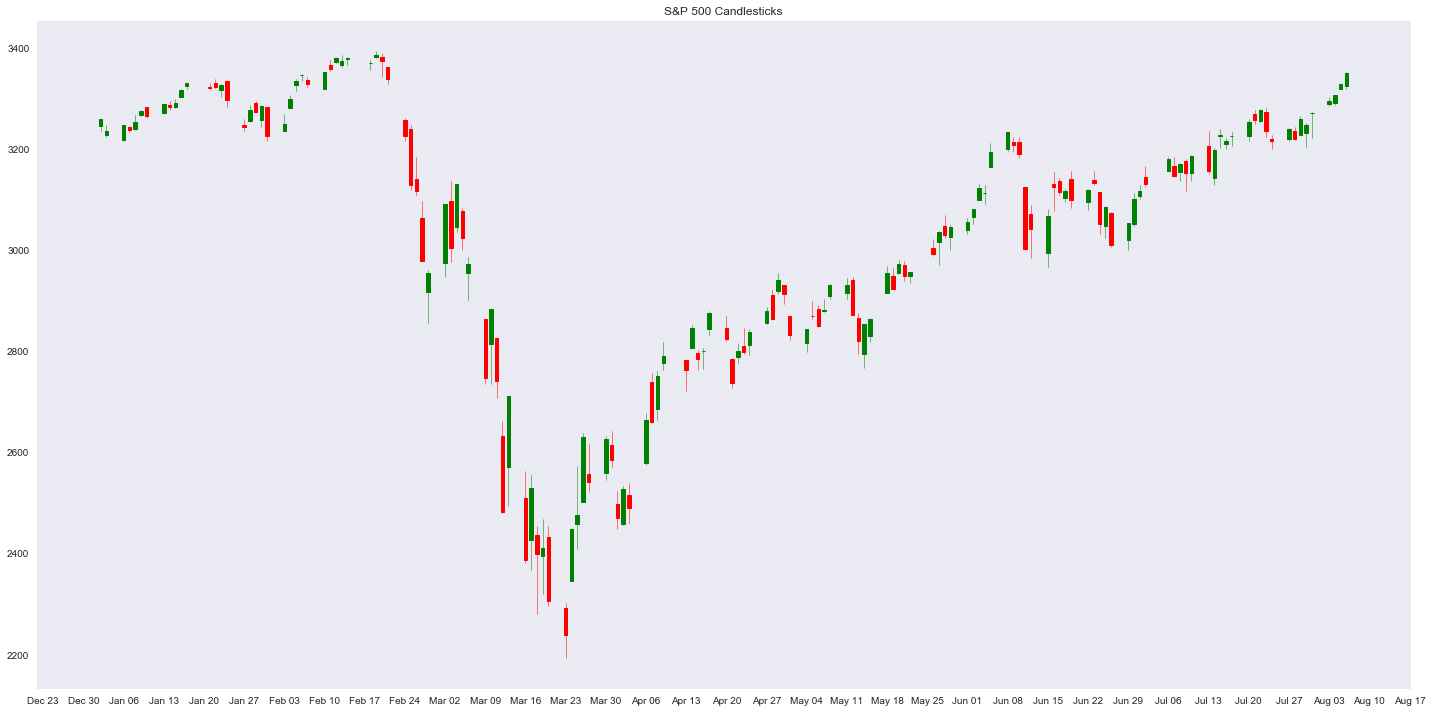

In [30]:
# Creating a new df to use for candlesticks
# Resetting index
SPX_reset = SPX.reset_index()

# Adding a new column which converts the date to a number value
SPX_reset['date_ax'] = SPX_reset['Date'].apply(lambda date: date2num(date))

# Pulling out values in a tuple form for the listed columns
list_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
SPX_values = [tuple(vals) for vals in SPX_reset[list_cols].values]

fig, ax = plt.subplots(figsize=(20,10))

# Setting x axis as the Monday for each week
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(weekFormatter)

# Candlestick
candlestick_ohlc(ax, SPX_values, width=0.6, colorup='g', colordown='r')
plt.title("S&P 500 Candlesticks")
plt.tight_layout()
plt.savefig("Figures/Figure15")
plt.show()

In [31]:
# Daily Percentage Change(rt)= (pt/(pt-1))-1
# Calculating the return from the Close price column
DJI['Returns'] = DJI['Close'].pct_change(1)
NDX['Returns'] = NDX['Close'].pct_change(1)
SPX['Returns'] = SPX['Close'].pct_change(1)
SPX.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Returns
Date,,,,,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,1.122088e+13,NaN,NaN,NaN
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,1.116737e+13,NaN,NaN,-0.007060
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,1.182150e+13,NaN,NaN,0.003533
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,1.108839e+13,NaN,NaN,-0.002803
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,1.205044e+13,NaN,NaN,0.004902


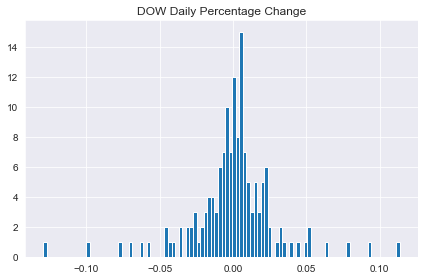

In [32]:
# Histogram of DOW Daily Percentage Change
DJI['Returns'].hist(bins=100)
plt.title("DOW Daily Percentage Change")
plt.tight_layout()
plt.savefig("Figures/Figure16")
plt.show()

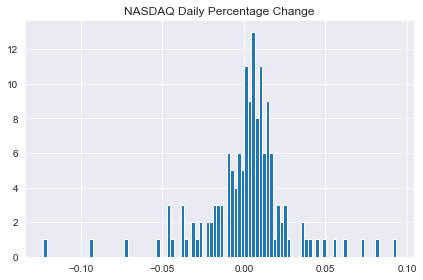

In [33]:
# Histogram of NASDAQ Daily Percentage Change
NDX['Returns'].hist(bins=100)
plt.title("NASDAQ Daily Percentage Change")
plt.tight_layout()
plt.savefig('Figures/Figure17')
plt.show()

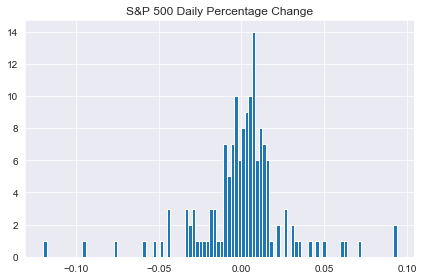

In [34]:
# Histogram of S&P 500 Daily Percentage Change
SPX['Returns'].hist(bins=100)
plt.title("S&P 500 Daily Percentage Change")
plt.tight_layout()
plt.savefig("Figures/Figure18")
plt.show()

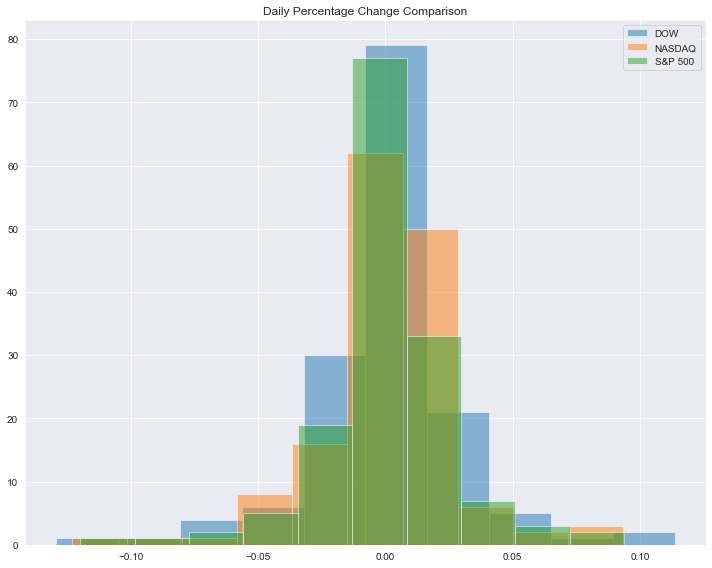

In [35]:
# Combined Daily Percentage Change histogram of all indices
DJI['Returns'].hist(bins=10, label='DOW', figsize=(10,8), alpha=0.5)
NDX['Returns'].hist(bins=10, label='NASDAQ', alpha=0.5)
SPX['Returns'].hist(bins=10, label='S&P 500', alpha=0.5)
plt.legend()
plt.title("Daily Percentage Change Comparison")
plt.tight_layout()
plt.savefig("Figures/Figure19")
plt.show()

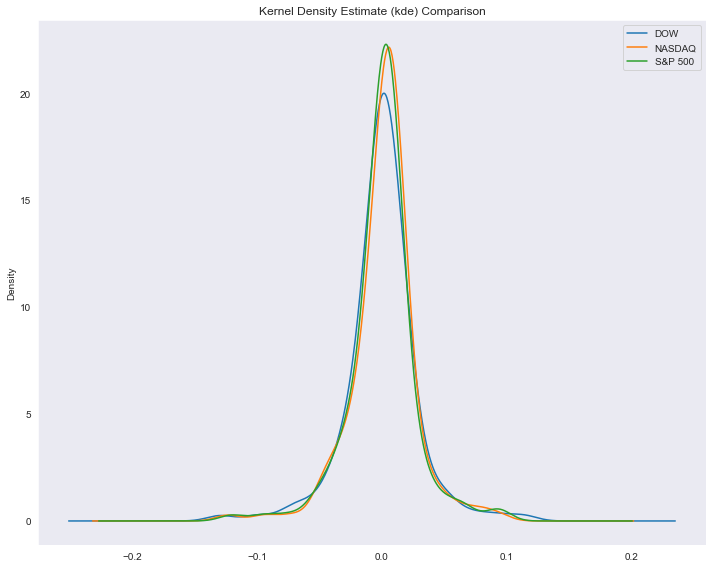

In [36]:
# Another visualization of the Daily Percentage Change for all indices
DJI['Returns'].plot(kind='kde', label='DOW', figsize=(10,8))
NDX['Returns'].plot(kind='kde', label='NASDAQ')
SPX['Returns'].plot(kind='kde', label='S&P 500')
plt.title("Kernel Density Estimate (kde) Comparison")
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure20")
plt.show()

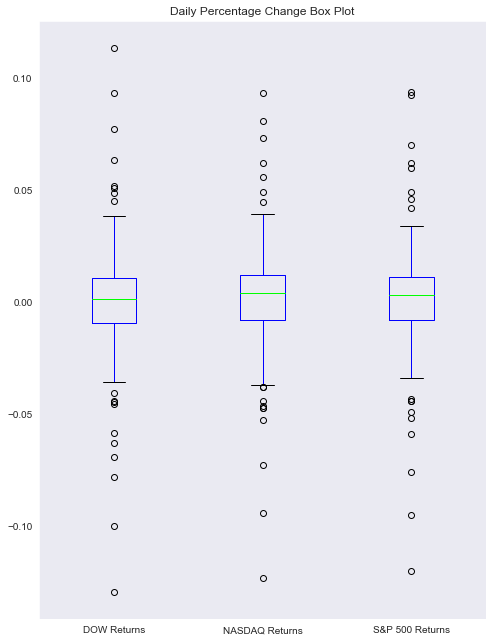

In [37]:
# Box plot of the Daily Percentage Change for all indices
box_df = pd.concat([DJI['Returns'],NDX['Returns'],SPX['Returns']], axis=1)
box_df.columns = ['DOW Returns', 'NASDAQ Returns', 'S&P 500 Returns']
box_df.plot(kind='box', figsize=(8,11), colormap='brg', title="Daily Percentage Change Box Plot")
plt.savefig("Figures/Figure21")
plt.show()

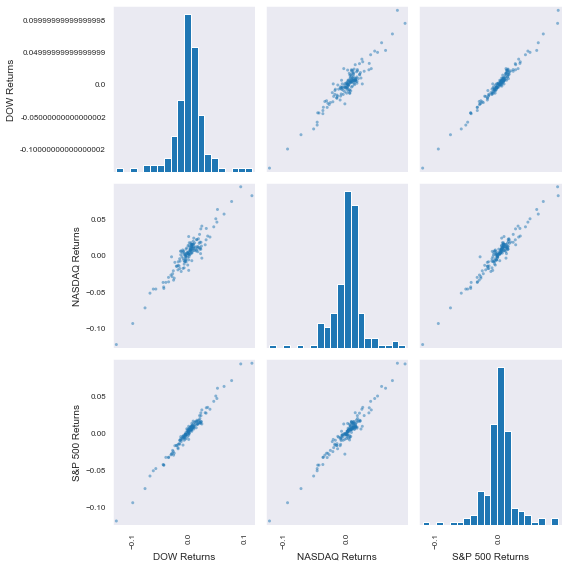

In [38]:
# Scatter plot to view relationship between 3 indices
scatter_matrix(box_df, figsize=(8,8), alpha=0.5, hist_kwds={'bins':20})
plt.tight_layout()
plt.show()

In [39]:
# box_df.plot(kind='scatter', x='NASDAQ Returns', y='S&P 500 Returns', alpha=0.5, figsize=(10,8))
# plt.show()

In [40]:
# Calculating Cumulative Daily Returns
# Cumulative Returns = (1+ pct_daily_returns).cumprod()

DJI['Cumulative Return'] = (1 + DJI['Returns']).cumprod()
NDX['Cumulative Return'] = (1 + NDX['Returns']).cumprod()
SPX['Cumulative Return'] = (1 + SPX['Returns']).cumprod()
DJI.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,MA50,Returns,Cumulative Return
Date,,,,,,,,,,,
2020-01-02,28872.800781,28627.769531,28638.970703,28868.800781,251820000,28868.800781,7.211866e+12,NaN,NaN,NaN,NaN
2020-01-03,28716.310547,28500.359375,28553.330078,28634.880859,239590000,28634.880859,6.841092e+12,NaN,NaN,-0.008103,0.991897
2020-01-06,28708.019531,28418.630859,28465.500000,28703.380859,252760000,28703.380859,7.194940e+12,NaN,NaN,0.002392,0.994270
2020-01-07,28685.500000,28565.279297,28639.179688,28583.679688,258900000,28583.679688,7.414684e+12,NaN,NaN,-0.004170,0.990124
2020-01-08,28866.179688,28522.509766,28556.140625,28745.089844,291750000,28745.089844,8.331254e+12,NaN,NaN,0.005647,0.995715


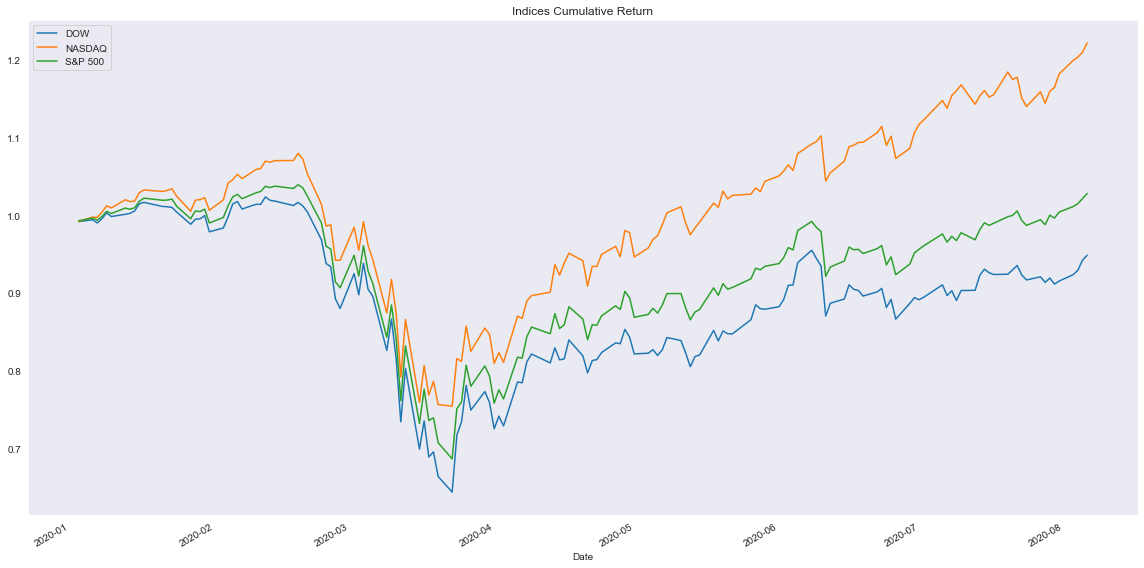

In [41]:
# Plotting Cumulative Return for all indices
DJI['Cumulative Return'].plot(label='DOW', figsize=(16,8), title='Indices Cumulative Return')
NDX['Cumulative Return'].plot(label='NASDAQ')
SPX['Cumulative Return'].plot(label='S&P 500')
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Figure22")
plt.show()

C:\Users\nabis\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\nabis\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\nabis\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

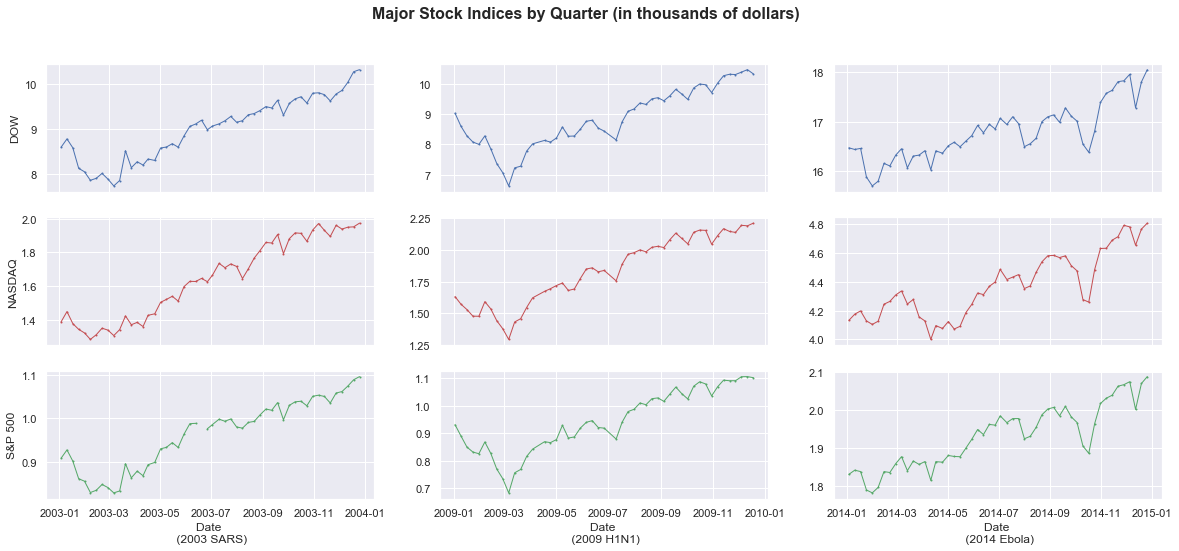

In [42]:
# SARS in 2003
# Swine Flu in 2009
# Ebola in 2014

sns.set(style='darkgrid')

# filtering for each of the years
yr_2003 = merged_df.loc[(merged_df['Date']>='2003-01-01')&(merged_df['Date']<='2003-12-31')]
yr_2003['Quarter'] = yr_2003['Date'].dt.quarter

yr_2009 = merged_df.loc[(merged_df['Date']>='2009-01-01')&(merged_df['Date']<='2009-12-31')]
yr_2009['Quarter'] = yr_2009['Date'].dt.quarter

yr_2014 = merged_df.loc[(merged_df['Date']>='2014-01-01')&(merged_df['Date']<='2014-12-31')]
yr_2014['Quarter'] = yr_2014['Date'].dt.quarter

# assigning x_values to each plot
x_axis_2003 = yr_2003['Date']
x_axis_2009 = yr_2009['Date']
x_axis_2014 = yr_2014['Date']

# creating a figure with 9 plots
fig, (ax1, ax2, ax3) = plt.subplots(3,3, sharex='col', figsize=(20,8))
fig.suptitle("Major Stock Indices by Quarter (in thousands of dollars)", fontsize=16, fontweight="bold")

# SARS April 2003
ax1[0].plot(x_axis_2003, yr_2003['Value Dow']/1000, linewidth=1, marker="o", markersize=1)
ax1[0].set_ylabel("DOW")

ax2[0].plot(x_axis_2003, yr_2003['Value Nasdaq']/1000, linewidth=1, marker="o", color="r", markersize=1)
ax2[0].set_ylabel("NASDAQ")

ax3[0].plot(x_axis_2003, yr_2003['Value S&P 500']/1000, linewidth=1, marker="o", color="g", markersize=1)
ax3[0].set_ylabel("S&P 500")
ax3[0].set_xlabel("Date \n (2003 SARS)")

# Swine Flu April 2009 (Pandemic)
ax1[1].plot(x_axis_2009, yr_2009['Value Dow']/1000, linewidth=1, marker="o", markersize=1)
# ax1[1].set_ylabel("2009 DOW")

ax2[1].plot(x_axis_2009, yr_2009['Value Nasdaq']/1000, linewidth=1, marker="o", color="r", markersize=1)
# ax2[1].set_ylabel("2009 NASDAQ")

ax3[1].plot(x_axis_2009, yr_2009['Value S&P 500']/1000, linewidth=1, marker="o", color="g", markersize=1)
# ax3[1].set_ylabel("2009 S&P 500")
ax3[1].set_xlabel("Date \n (2009 H1N1)")

# Ebola March 2014
ax1[2].plot(x_axis_2014, yr_2014['Value Dow']/1000, linewidth=1, marker="o", markersize=1)
# ax1[2].set_ylabel("2014 DOW")

ax2[2].plot(x_axis_2014, yr_2014['Value Nasdaq']/1000, linewidth=1, marker="o", color="r", markersize=1)
# ax2[2].set_ylabel("2014 NASDAQ")

ax3[2].plot(x_axis_2014, yr_2014['Value S&P 500']/1000, linewidth=1, marker="o", color="g", markersize=1)
# ax3[2].set_ylabel("2014 S&P 500")
ax3[2].set_xlabel("Date \n (2014 Ebola)")

plt.savefig('Figures/Figure23')
plt.show()